# Analysis of PS4 and XBOX One Video Game Sales

The project's aim is to learn what factor influences the most sales for a video game. This project may benefit the video game publishers reading this as everything analyzed refers to the correlation of factors to sales. The factors included in this study are genre, year, region, and publisher.

The dataset used is "Video Game Sales Dataset" from kaggle (https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=XboxOne_GameSales.csv). Albeit the dataset has three csv files, we are only using two since the focus of this study is only on the PS4 and XBox One. The selected datasets contain the following columns: Game, Year, Genre, Publisher, North America, Europe, Japan, Rest of World, and Global. There are around 1000 games for the PS4 and 600 for the XBox One (may have same games), making this project have a decent size considering that there are only 5 years in the dataset (PS4 and XBox One was released on 2013). 

The following libraries were used for the project: <b>collections, numpy and pandas</b> for calculation and data analysis, <b>seaborn and matplotlib</b> for visualizations. The techniques used in the project are aligned to the teachings from the course "Data Analysis with Python: Zero to Pandas" by Jovian in partnership with freecodecamp.

# Table of Contents
### 1. Assessing and Cleaning the Dataset
In this section, we will look at the dataset and change it to get better inisights and create the best visualizations possible. This section will include removing rows with nulls, no sales, and games with duplicates. We will also be combining the PS4 and XBox One dataset and adding a total sales column. The essence of this section is to delete errors in the dataset and make sure what we use for visualization is optimal. 
### 2. Exploratory Data Analysis and Data Visualization
In this section, we will try and get insights from the preprocessed dataset from visualizations. As we gain insights from the visualizations, we will be asking questions in the form of hypotheses to further our knowledge in the dataset. These hypotheses mentioned are as follows:
1. The publisher of the the top game is also the publisher with the highest sales.
2. The higher the game count of a publisher, the more sales the publisher has.
3. The top publisher in the most sold region is also the top publisher in the other regions
4. A region's interest in a genre differs from one another due to difference in culture and tradition. 
5. The top publisher's performance is infulenced by the market's performance.
6. A top publisher are creating games according to highest selling genre.

### 3. Conclusion
We sum up our insights and the answers to our 6 hypotheses in this section. 
### 4. Recommendations
For this section, we state our recommendations if one is to re-do the study based on the insights we gathered in the exploratory data analysis and data visualization. 
###  5. References
The sources found in this section were used in the project.

# Assessing and Cleaning the Dataset
We begin by importing the libraries and uploading the datasets.

In [96]:
!pip install opendatasets --upgrade

Requirement already up-to-date: opendatasets in /opt/conda/lib/python3.8/site-packages (0.1.10)


In [97]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import collections
import opendatasets as od
import jovian
%matplotlib inline
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (10, 4)

In [98]:
#od.download('https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=XboxOne_GameSales.csv')
#od.download('https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=PS4_GamesSales.csv')

In [99]:
ps4_sales = pd.read_csv('./videogames-sales-dataset/PS4_GamesSales.csv', header=0, encoding='unicode_escape')
ps4_sales

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [100]:
xbox_one_sales = pd.read_csv('./videogames-sales-dataset/XboxOne_GameSales.csv', header=0, encoding='unicode_escape')
xbox_one_sales

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


The Xbox One sales dataframe has a unique called 'Pos,' which is basically the same to the automatically generated index in Python. Thus, we must drop the 'Pos' column.

In [101]:
xbox_pos_drop = xbox_one_sales.drop('Pos', axis = 1)
xbox_pos_drop

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...
608,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


In [102]:
raw_merged = ps4_sales.merge(xbox_pos_drop, on = ['Game', 'Year','Genre', 'Publisher'])
raw_merged.columns = ['Game', 'Year', 'Genre', 'Publisher', 'PS4_NA', 'PS4_EU',
       'PS4_JP', 'PS4_Rest_of_World', 'PS4_Global', 'XB1_NA', 'XB1_EU',
       'XB1_JP', 'XB1_Rest_of_World', 'XB1_Global']
raw_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 469
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Game               470 non-null    object 
 1   Year               420 non-null    float64
 2   Genre              470 non-null    object 
 3   Publisher          420 non-null    object 
 4   PS4_NA             470 non-null    float64
 5   PS4_EU             470 non-null    float64
 6   PS4_JP             470 non-null    float64
 7   PS4_Rest_of_World  470 non-null    float64
 8   PS4_Global         470 non-null    float64
 9   XB1_NA             470 non-null    float64
 10  XB1_EU             470 non-null    float64
 11  XB1_JP             470 non-null    float64
 12  XB1_Rest_of_World  470 non-null    float64
 13  XB1_Global         470 non-null    float64
dtypes: float64(11), object(3)
memory usage: 55.1+ KB


Merging the XBox One and PS4 tables on game, year, publisher, and genre will help us generating visualizations and insights about both of the consoles' performance. 

In [103]:
raw_merged.sort_values('Year', ascending = True).tail(51)

,Game,Year,Genre,Publisher,PS4_NA,PS4_EU,PS4_JP,PS4_Rest_of_World,PS4_Global,XB1_NA,XB1_EU,XB1_JP,XB1_Rest_of_World,XB1_Global
395,Whore of the Orient,2020.0,Misc,Warner Bros. Interactive Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,A Boy and His Blob,NaN,Platform,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,Another World,NaN,Adventure,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,Woolfe: The Red Hood Diaries,NaN,Adventure,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,King's Quest I: Quest for the Crown (VGA Version),NaN,Misc,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389,Pier Solar and the Great Architects,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,Gran Turismo HD Concept,NaN,Misc,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,Dear Esther,NaN,Adventure,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,Guacamelee!,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,The Banner Saga,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


According to the info function, the Year column has null values, so they must be dropped to conduct a yearly analysis. Alternatively, we could of replaced the year's value by averaging the next and prior's value. However, after further inspection, games that have no year values actually represent upcoming games, which means there will be no significance in the analysis since there is no sales yet. Additionally, we must also drop the games with 0 total sales since these games were also unreleased during the dataset's release on Kaggle. Lastly, we must drop games with repeating names. Deducting the length of unique values in game to the total rows of the dataframe, we can infer that there is only one game that repeats.

Aside from the data preprocessing, we must also add a column that states the total sales of both PS4 and XBox One as it will help us answer some questions regarding yearly performance, genre performance, and more.

In [104]:
raw_merged = raw_merged.dropna()
#Drops all rows with null values. In this case, all rows with years as null.
raw_merged['NA_Sales'] = raw_merged['PS4_NA'] + raw_merged['XB1_NA']
raw_merged['EU_Sales'] = raw_merged['PS4_EU'] + raw_merged['XB1_EU']
raw_merged['JP_Sales'] = raw_merged['PS4_JP'] + raw_merged['XB1_JP']
raw_merged['Rest_of_World_Sales'] = raw_merged['PS4_Rest_of_World'] + raw_merged['XB1_Rest_of_World']
raw_merged['Total_Sales'] = raw_merged['PS4_Global'] + raw_merged['XB1_Global']
#Creating a new column for total sales
raw_merged = raw_merged.drop_duplicates(subset=['Game'])
#Drops game duplicates
raw_merged = raw_merged[raw_merged['Total_Sales']!=0]
#Drops games with a 0 total_sale
raw_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 453
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game                 380 non-null    object 
 1   Year                 380 non-null    float64
 2   Genre                380 non-null    object 
 3   Publisher            380 non-null    object 
 4   PS4_NA               380 non-null    float64
 5   PS4_EU               380 non-null    float64
 6   PS4_JP               380 non-null    float64
 7   PS4_Rest_of_World    380 non-null    float64
 8   PS4_Global           380 non-null    float64
 9   XB1_NA               380 non-null    float64
 10  XB1_EU               380 non-null    float64
 11  XB1_JP               380 non-null    float64
 12  XB1_Rest_of_World    380 non-null    float64
 13  XB1_Global           380 non-null    float64
 14  NA_Sales             380 non-null    float64
 15  EU_Sales             380 non-null    flo

As seen in the info function, there are no null values remaining in any of the columns. We can also see that there are no game with a zero total sales, signifying that all the games in the dataframe have released.

In [105]:
raw_merged.sort_values('Total_Sales')

,Game,Year,Genre,Publisher,PS4_NA,PS4_EU,PS4_JP,PS4_Rest_of_World,PS4_Global,XB1_NA,XB1_EU,XB1_JP,XB1_Rest_of_World,XB1_Global,NA_Sales,EU_Sales,JP_Sales,Rest_of_World_Sales,Total_Sales
377,Woodcutter Simulator 2016,2015.0,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01
372,Farming 2017 - The Simulation,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01
378,Valhalla Hills,2017.0,Strategy,Kalypso Media,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01
374,Ziggurat,2016.0,Shooter,Soedesco,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.02
373,ATV Renegades,2017.0,Racing,Nighthawk Interactive,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,0.98,1.92,0.00,0.23,3.14,2.25,10.56,0.15,1.96,14.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,3.75,1.91,0.00,0.57,6.23,8.42,8.12,0.40,2.69,19.63
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,3.76,1.47,0.00,0.54,5.77,9.02,7.68,0.21,2.80,19.71
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,4.63,2.04,0.02,0.68,7.37,10.81,8.09,0.43,3.12,22.46


In [106]:
raw_merged.describe()

,Year,PS4_NA,PS4_EU,PS4_JP,PS4_Rest_of_World,PS4_Global,XB1_NA,XB1_EU,XB1_JP,XB1_Rest_of_World,XB1_Global,NA_Sales,EU_Sales,JP_Sales,Rest_of_World_Sales,Total_Sales
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2015.892105,0.386658,0.502289,0.042816,0.173500,1.105579,0.331579,0.160132,0.000447,0.049605,0.541658,0.718237,0.662421,0.043263,0.223105,1.647237
std,1.216180,0.754032,1.139067,0.142667,0.344605,2.200837,0.641499,0.365113,0.002631,0.096049,1.056320,1.384762,1.496667,0.143573,0.436965,3.225537
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2015.000000,0.040000,0.010000,0.000000,0.010000,0.080000,0.040000,0.000000,0.000000,0.010000,0.050000,0.080000,0.020000,0.000000,0.020000,0.127500
50%,2016.000000,0.110000,0.120000,0.000000,0.050000,0.290000,0.100000,0.030000,0.000000,0.010000,0.140000,0.200000,0.155000,0.000000,0.060000,0.445000
75%,2017.000000,0.372500,0.475000,0.030000,0.170000,1.095000,0.322500,0.142500,0.000000,0.050000,0.542500,0.705000,0.615000,0.030000,0.220000,1.645000
max,2018.000000,6.180000,9.710000,2.170000,3.020000,19.390000,4.700000,3.250000,0.020000,0.760000,8.720000,10.810000,12.960000,2.170000,3.780000,28.110000


Although the current state of the dataset may seem use-able for computing a yearly sale comparison or console sale comparison, it will not be able to answer questions regarding a publisher's performance against other publishers since some publishers have different names. For example, Namco Bandai Games and Bandai Namco Games are found in the dataset despite being the same company. Thus, we must rename these publishers as a single company. The following publishers are the only ones that I have noticed.
1. Namco Bandai Games and Bandai Namco Games
2. THQ Nordic and Nordic Games
3. Tecmo Koei and Koei Tecmo
4. Milestone S.r.l., Milestone S.r.l, and Milestone
5. Big Ben Interactive and Bigben Interactive
6. 2K Games and 2K Sports
7. Electronic Arts and EA Sports

Some publishers may have undergone a complete name change, requiring an intensive research on each publisher's history to make the dataset as accurate as possible.

In [107]:
raw_merged[raw_merged['Publisher']=='Namco Bandai Games']

,Game,Year,Genre,Publisher,PS4_NA,PS4_EU,PS4_JP,PS4_Rest_of_World,PS4_Global,XB1_NA,XB1_EU,XB1_JP,XB1_Rest_of_World,XB1_Global,NA_Sales,EU_Sales,JP_Sales,Rest_of_World_Sales,Total_Sales
13,The Witcher 3: Wild Hunt,2015.0,Role-Playing,Namco Bandai Games,1.48,2.82,0.28,0.81,5.39,0.97,0.61,0.01,0.15,1.74,2.45,3.43,0.29,0.96,7.13
49,Dark Souls III,2016.0,Role-Playing,Namco Bandai Games,1.00,0.63,0.44,0.34,2.42,0.56,0.15,0.00,0.08,0.79,1.56,0.78,0.44,0.42,3.21
66,Tekken 7,2017.0,Fighting,Namco Bandai Games,0.60,0.72,0.12,0.26,1.70,0.30,0.23,0.00,0.05,0.58,0.90,0.95,0.12,0.31,2.28
68,Naruto Shippuden: Ultimate Ninja Storm 4,2016.0,Fighting,Namco Bandai Games,0.71,0.47,0.12,0.24,1.54,0.25,0.07,0.00,0.03,0.35,0.96,0.54,0.12,0.27,1.89
71,Dragon Ball: Xenoverse 2,2016.0,Action,Namco Bandai Games,0.54,0.59,0.14,0.23,1.50,0.33,0.09,0.00,0.05,0.47,0.87,0.68,0.14,0.28,1.97
74,Dragon Ball Fighter Z,2018.0,Fighting,Namco Bandai Games,0.61,0.51,0.12,0.23,1.46,0.38,0.09,0.00,0.05,0.52,0.99,0.60,0.12,0.28,1.98
88,Dragon Ball: XenoVerse,2015.0,Fighting,Namco Bandai Games,0.33,0.55,0.14,0.17,1.19,0.21,0.11,0.00,0.03,0.35,0.54,0.66,0.14,0.20,1.54
126,Dark Souls II,2015.0,Role-Playing,Namco Bandai Games,0.27,0.23,0.09,0.10,0.69,0.19,0.07,0.00,0.03,0.28,0.46,0.30,0.09,0.13,0.97
132,One Piece: Burning Blood,2016.0,Fighting,Namco Bandai Games,0.21,0.26,0.09,0.09,0.65,0.11,0.07,0.00,0.02,0.19,0.32,0.33,0.09,0.11,0.84
150,Project CARS 2,2017.0,Racing,Namco Bandai Games,0.10,0.35,0.02,0.08,0.55,0.01,0.18,0.00,0.01,0.20,0.11,0.53,0.02,0.09,0.75


In [108]:
raw_merged[raw_merged['Publisher']=='Bandai Namco Games']

,Game,Year,Genre,Publisher,PS4_NA,PS4_EU,PS4_JP,PS4_Rest_of_World,PS4_Global,XB1_NA,XB1_EU,XB1_JP,XB1_Rest_of_World,XB1_Global,NA_Sales,EU_Sales,JP_Sales,Rest_of_World_Sales,Total_Sales
83,Project CARS,2015.0,Racing,Bandai Namco Games,0.29,0.76,0.04,0.19,1.28,0.21,0.16,0.0,0.04,0.41,0.50,0.92,0.04,0.23,1.69
189,Naruto to Boruto: Shinobi Striker,2018.0,Action,Bandai Namco Games,0.19,0.03,0.02,0.05,0.29,0.17,0.00,0.0,0.02,0.19,0.36,0.03,0.02,0.07,0.48


In [109]:
raw_merged[raw_merged['Publisher']=='Bigben Interactive']

,Game,Year,Genre,Publisher,PS4_NA,PS4_EU,PS4_JP,PS4_Rest_of_World,PS4_Global,XB1_NA,XB1_EU,XB1_JP,XB1_Rest_of_World,XB1_Global,NA_Sales,EU_Sales,JP_Sales,Rest_of_World_Sales,Total_Sales
256,Rugby 15,2015.0,Sports,Bigben Interactive,0.05,0.06,0.0,0.02,0.13,0.03,0.05,0.0,0.01,0.09,0.08,0.11,0.0,0.03,0.22
295,Hunting Simulator,2017.0,Shooter,Bigben Interactive,0.06,0.00,0.0,0.01,0.07,0.05,0.00,0.0,0.01,0.06,0.11,0.00,0.0,0.02,0.13
296,WRC 7,2017.0,Racing,Bigben Interactive,0.06,0.00,0.0,0.01,0.07,0.04,0.00,0.0,0.01,0.05,0.10,0.00,0.0,0.02,0.12
306,Sherlock Holmes: The Devil's Daughter,2016.0,Adventure,Bigben Interactive,0.05,0.00,0.0,0.01,0.06,0.05,0.00,0.0,0.01,0.06,0.10,0.00,0.0,0.02,0.12
313,Handball 16,2015.0,Sports,Bigben Interactive,0.00,0.05,0.0,0.01,0.06,0.00,0.00,0.0,0.00,0.00,0.00,0.05,0.0,0.01,0.06
320,WRC 5: FIA World Rally Championship,2015.0,Racing,Bigben Interactive,0.00,0.05,0.0,0.01,0.06,0.00,0.01,0.0,0.00,0.02,0.00,0.06,0.0,0.01,0.08
366,FlatOut 4: Total Insanity,2017.0,Racing,Bigben Interactive,0.01,0.00,0.0,0.00,0.02,0.01,0.00,0.0,0.00,0.01,0.02,0.00,0.0,0.00,0.03


In [110]:
raw_merged[raw_merged['Publisher']=='Big Ben Interactive']

,Game,Year,Genre,Publisher,PS4_NA,PS4_EU,PS4_JP,PS4_Rest_of_World,PS4_Global,XB1_NA,XB1_EU,XB1_JP,XB1_Rest_of_World,XB1_Global,NA_Sales,EU_Sales,JP_Sales,Rest_of_World_Sales,Total_Sales
315,Rugby World Cup 2015,2015.0,Sports,Big Ben Interactive,0.0,0.05,0.0,0.01,0.06,0.0,0.02,0.0,0.0,0.02,0.0,0.07,0.0,0.01,0.08


In an attempt to solve this problem, I converted the dataframe to a dictionary and ran a for loop on it since I had problems running iterations on a pandas dataframe. I also created a checkpoint here to preserve the values of the earlier dataframe just in case the values get mixed up.

In [111]:
df_final_temp = raw_merged.copy()
df_final_temp = df_final_temp.to_dict('index')
#Converts a dataframe to a dictionary. 'index' means that the dictionary will be preceded with an automatically generated
#index. For example, {1:{'Name':'Jules','Age':'59'}}.
for i in df_final_temp:
    if df_final_temp[i]['Publisher'] == 'Bandai Namco Games':
        df_final_temp[i]['Publisher'] = 'Namco Bandai Games'
    elif df_final_temp[i]['Publisher'] == 'Nordic Games':
        df_final_temp[i]['Publisher'] = 'THQ Nordic'
    elif df_final_temp[i]['Publisher'] == 'Koei Tecmo':
        df_final_temp[i]['Publisher'] = 'Tecmo Koei'
    elif df_final_temp[i]['Publisher'] == 'Milestone S.r.l':
        df_final_temp[i]['Publisher'] = 'Milestone S.r.l.'
    elif df_final_temp[i]['Publisher'] == 'Milestone':
        df_final_temp[i]['Publisher'] = 'Milestone S.r.l.'
    elif df_final_temp[i]['Publisher'] == 'Big Ben Interactive':
        df_final_temp[i]['Publisher'] = 'Bigben Interactive'
    elif df_final_temp[i]['Publisher'] == 'EA Sports':
        df_final_temp[i]['Publisher'] = 'Electronic Arts'
    elif df_final_temp[i]['Publisher'] == '2K Sports':
        df_final_temp[i]['Publisher'] = '2K Games'
df_final = pd.DataFrame.from_dict(df_final_temp).T
#Converts a dictionary to a dataframe. .T function refers to transposing/switching the columns and rows.
df_final   

,Game,Year,Genre,Publisher,PS4_NA,PS4_EU,PS4_JP,PS4_Rest_of_World,PS4_Global,XB1_NA,XB1_EU,XB1_JP,XB1_Rest_of_World,XB1_Global,NA_Sales,EU_Sales,JP_Sales,Rest_of_World_Sales,Total_Sales
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.6,3.02,19.39,4.7,3.25,0.01,0.76,8.72,10.76,12.96,0.61,3.78,28.11
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,4.63,2.04,0.02,0.68,7.37,10.81,8.09,0.43,3.12,22.46
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,3.76,1.47,0,0.54,5.77,9.02,7.68,0.21,2.8,19.71
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.4,2.12,13.4,3.75,1.91,0,0.57,6.23,8.42,8.12,0.4,2.69,19.63
4,FIFA 18,2017,Sports,Electronic Arts,1.27,8.64,0.15,1.73,11.8,0.98,1.92,0,0.23,3.14,2.25,10.56,0.15,1.96,14.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Moto Racer 4,2016,Racing,PQube,0.01,0,0,0,0.01,0.02,0,0,0,0.02,0.03,0,0,0,0.03
376,Lock's Quest,2017,Strategy,THQ Nordic,0.01,0,0,0,0.01,0.01,0,0,0,0.02,0.02,0,0,0,0.03
377,Woodcutter Simulator 2016,2015,Action,Namco Bandai Games,0,0.01,0,0,0.01,0,0,0,0,0,0,0.01,0,0,0.01
378,Valhalla Hills,2017,Strategy,Kalypso Media,0.01,0,0,0,0.01,0,0,0,0,0,0.01,0,0,0,0.01


In [112]:
jovian.commit(project='PS4_and_XBox_Sales_Analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jules-stamaria39/ps4-and-xbox-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis


'https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis'

# Exploratory Analysis and Visualization
In this section, we will visualize graphs based on the dataframe and create hypotheses along the way. The hypotheses will then be attempted to be proven or debunked with further analysis.

In [113]:
df_final[['PS4_Global','XB1_Global']] = df_final[['PS4_Global','XB1_Global']].astype(float)
df_final.describe()

,PS4_Global,XB1_Global
count,380.000000,380.000000
mean,1.105579,0.541658
std,2.200837,1.056320
min,0.000000,0.000000
25%,0.080000,0.050000
50%,0.290000,0.140000
75%,1.095000,0.542500
max,19.390000,8.720000


To begin on the EDA, we must first find a point where we can start asking questions. One way of doing this is by using the describe function, wherein various statistical values are computed. Using the table above, we can notice that the max of PS4 sales is more than double its counterpart, Xbox One. This is true with its mean as well, which may already indicate that PS4's market is larger to Xbox One's.

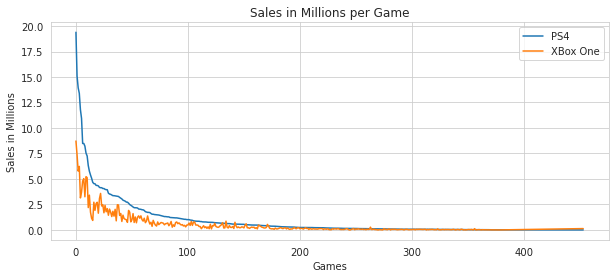

In [114]:
plt.plot(df_final['PS4_Global'])
plt.plot(df_final['XB1_Global'])
plt.xlabel('Games')
plt.ylabel('Sales in Millions')
plt.title('Sales in Millions per Game')
plt.legend(['PS4','XBox One']);

More than anything, this graph proves PS4's big standard deviation compared to the XBox One. That means, even if the PS4 may seem to have a greater market due to the amount of sales, it does not mean that launching a game in PS4 is more successful than releasing a game in XBox One. Specifically, the top games in PS4 may be what's inflating the market. Analyzing the top 10 games will help us infer some more information about this.

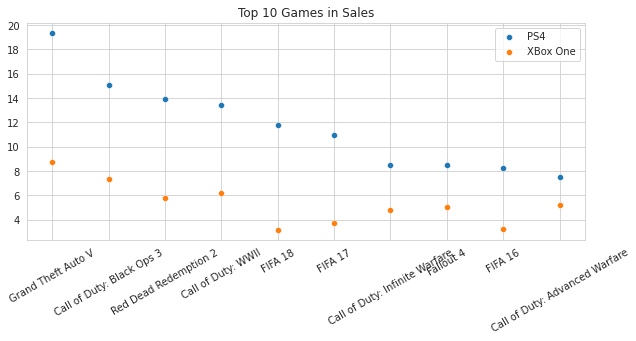

In [115]:
sns.scatterplot(x = df_final['Game'].head(10),y = df_final['PS4_Global'].head(10)).set(ylabel=None, xlabel=None)
sns.scatterplot(x = df_final['Game'].head(10),y = df_final['XB1_Global'].head(10)).set(ylabel=None, xlabel = None)
plt.xticks(rotation=30)
plt.title('Top 10 Games in Sales')
plt.legend(['PS4','XBox One']);

In [116]:
pd.DataFrame(df_final['Publisher'].head(10)).set_index(df_final['Game'].head(10))

,Publisher
Game,
Grand Theft Auto V,Rockstar Games
Call of Duty: Black Ops 3,Activision
Red Dead Redemption 2,Rockstar Games
Call of Duty: WWII,Activision
FIFA 18,Electronic Arts
FIFA 17,Electronic Arts
Call of Duty: Infinite Warfare,Activision
Fallout 4,Bethesda Softworks
FIFA 16,Electronic Arts


It's worth noting how high Grand Theft Auto V is compared to the other games. In PS4 sales alone, it is up 5 million in sales to the next highest sold game. This only further solidifies our assumptions in the prior graph.

Aside from analyzing the games themselves, we should also analyze the publishers of these games to gain more insights in the video game industry. Additionally, we could get a <b>hypothesis</b> stating: <b>(Hypothesis 1) The publisher of the the top game is also the publisher with the highest sales.

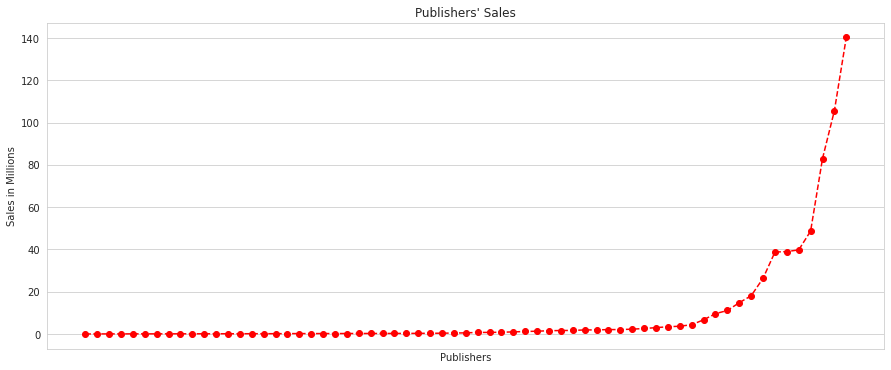

In [117]:
pub_val = df_final.groupby('Publisher')
pub_sales = pub_val['Total_Sales'].sum()
pub_sales = pub_sales.sort_values()
plt.figure(figsize=(15,6))
plt.plot(pub_sales,'o--r')
plt.xticks([]);
plt.xlabel('Publishers')
plt.ylabel('Sales in Millions')
plt.title("Publishers' Sales");

Seeing that majority of the publishers only had a million to 20 million sales for their game/s, it may be better if we create a condition to only look at publishers with a total sales greater than $ 20 million. It is also noticeable that there are huge gaps seen in the top 20 publishers, while the rest of the competition are sticking close to each other. This indicates that the gaming industry is highly dominated by select publishers only and that having the name of a top publisher may automatically make that game a success. Due to this, I will only be using the top publisher's data going forward.

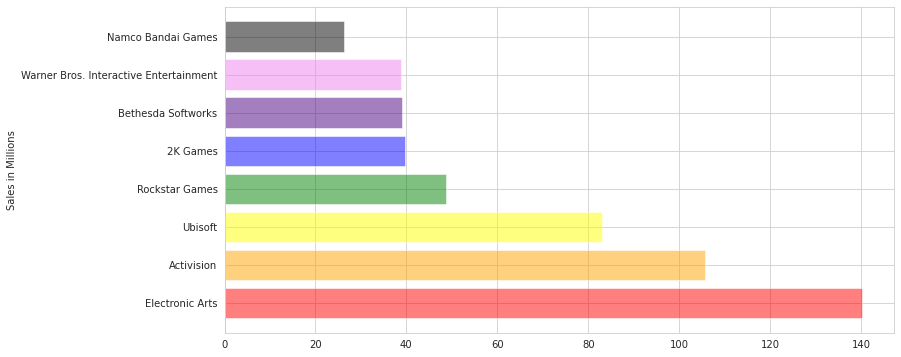

In [118]:
pub_sales = pub_sales[pub_sales > 20].sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.barh(pub_sales.index, pub_sales, color = ['red','orange','yellow','green','blue','indigo','violet','black'], alpha=0.5)
plt.ylabel('Sales in Millions');

As seen in the graph, Electronic Arts dominates the sales chart with a 140 million dollar total sales. Trailing behind Electronic Arts is Activision, which has a total sales of 105 million dollar. Based on the chart, it is noticeable that even the gap between the companies in the top 5 are significant. Researching on which region they sold the most may help us get insights to how they got these sales.

For the first hypothesis, there is enough evidence to debunk it. Rockstar Games, which is the publisher of 1st and 3rd highest sold game, is only the 4th total publisher. Activision, which is the publisher of the 2nd and 4th highest sold game, is only the 2nd total publisher. A possible reason to this is may be due to the total count of games published. Thus, we can create another hypothesis: <b> (Hypothesis 2) The higher the game count of a publisher, the more sales the publisher has.</b>

<b>Hypothesis 1: False

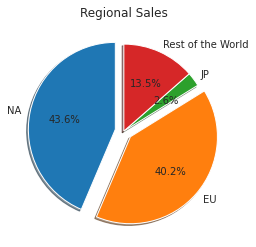

In [119]:
pub_NA_total_sales = df_final['NA_Sales'].sum()
pub_EU_total_sales = df_final['EU_Sales'].sum()
pub_JP_total_sales = df_final['JP_Sales'].sum()
pub_Rest_of_World_total_sales = df_final['Rest_of_World_Sales'].sum()
pub_array = [pub_NA_total_sales, pub_EU_total_sales, pub_JP_total_sales, pub_Rest_of_World_total_sales]
pub_array_explode = [0.1,0.1,0,0]
pub_labels = 'NA', 'EU', 'JP', 'Rest of the World'
pub_total_sales = df_final['Total_Sales'].sum()
plt.pie(pub_array, labels=pub_labels, autopct='%1.1f%%', startangle= 90, explode = pub_array_explode, shadow = True)
plt.title('Regional Sales');

Creating a pie chart of the regions' total sales will also help to distinguish which regions should be compared with each other. NA and EU region dominate the video game industry, with a combined 83.8% sales for the world. From the perspective of a game publisher, they should definitely focus their games on these regions. Thus, another hypothesis we could state: <b> (Hypothesis 3) The top publisher in the most sold region is also the top publisher in the other regions.

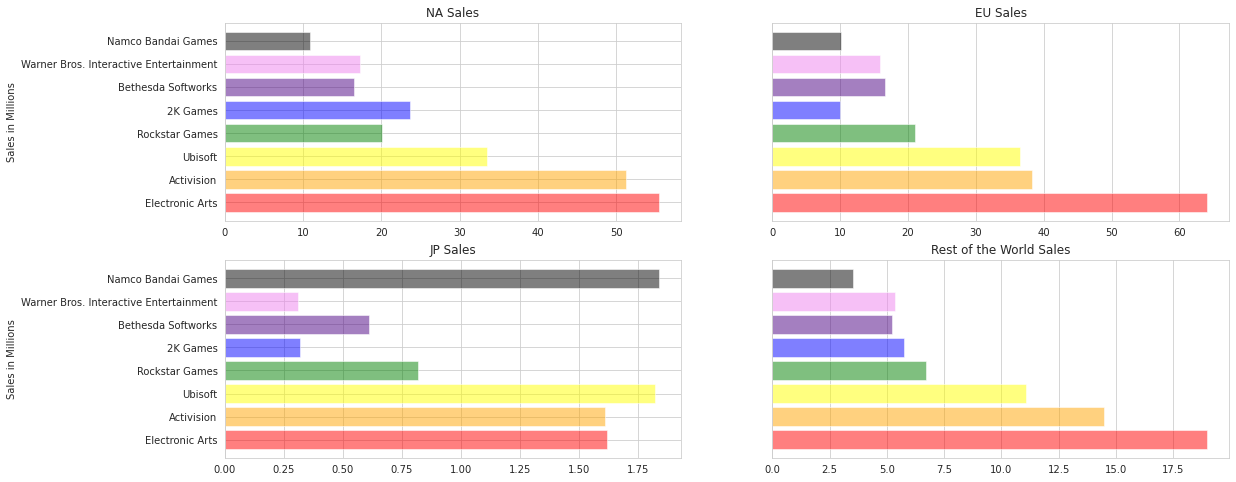

In [120]:
pub_NA_sales = pub_val['NA_Sales'].sum()
pub_NA_sales = pub_NA_sales[pub_sales.index]
pub_EU_sales = pub_val['EU_Sales'].sum()
pub_EU_sales = pub_EU_sales[pub_sales.index]
pub_JP_sales = pub_val['JP_Sales'].sum()
pub_JP_sales = pub_JP_sales[pub_sales.index]
pub_Rest_of_World_sales = pub_val['Rest_of_World_Sales'].sum()
pub_Rest_of_World_sales = pub_Rest_of_World_sales[pub_sales.index]

fig, axes = plt.subplots(2,2, figsize = (18,8))
axes[0,0].barh(pub_sales.index, pub_NA_sales, color = ['red','orange','yellow','green','blue','indigo','violet','black'], alpha=0.5)
axes[0,0].set_ylabel('Sales in Millions')
axes[0,0].set_title('NA Sales')

axes[0,1].barh(pub_sales.index, pub_EU_sales, color = ['red','orange','yellow','green','blue','indigo','violet','black'], alpha=0.5)
axes[0,1].set_yticks([])
axes[0,1].set_title('EU Sales')

axes[1,0].barh(pub_sales.index, pub_JP_sales, color = ['red','orange','yellow','green','blue','indigo','violet','black'], alpha=0.5)
axes[1,0].set_ylabel('Sales in Millions')
axes[1,0].set_title('JP Sales')

axes[1,1].barh(pub_sales.index, pub_Rest_of_World_sales, color = ['red','orange','yellow','green','blue','indigo','violet','black'], alpha=0.5)
axes[1,1].set_yticks([])
axes[1,1].set_title('Rest of the World Sales');

Right off the bat, it is noticeable how dominant Electronic Arts is in the industry. Electronic Arts leads in 3 out of 4 of the selected regions, with a significant lead in the EU and the rest of world regions. Also, we can see that despite being the number 1 publisher in Japan, Namco Bandai still has the lowest total sales. This may be due to Japan's niche market compared to the other regions. Thus, we may infer that a publisher focusing on the Japanese market may not be as profitable to a publisher focusing on the NA region.

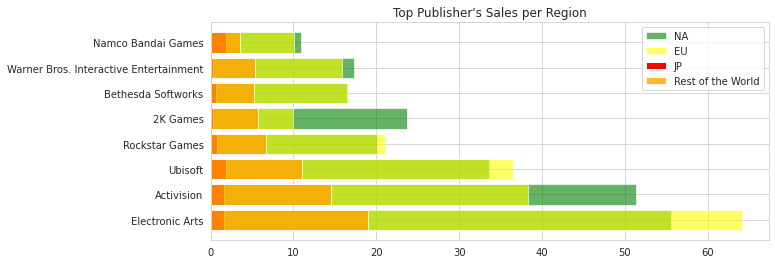

In [121]:
plt.barh(pub_sales.index, pub_NA_sales, alpha=0.6, color = 'green') 
plt.barh(pub_sales.index, pub_EU_sales, alpha=0.6, color = 'yellow')
plt.barh(pub_sales.index, pub_JP_sales, alpha=1, color = 'red')
plt.barh(pub_sales.index, pub_Rest_of_World_sales, alpha=0.8, color = 'orange')
plt.title("Top Publisher's Sales per Region")
plt.legend(pub_labels);

Alternatively, this is a bar chart containing the sales of the top publishers per region. A few takeaways we can take from this graph are based on the big gaps of certain publishers' sales between the NA and EU region. For example, Activision's NA sales has more than 10 million dollar difference compared to its EU counterpart. Similarly, 2K Games also has a 10 million dollar difference between NA and EU sales. This insight might help in determining if there is a correlation between the genre of a game and the regional sales.

For the third hypothesis, it is convincing that this hypothesis is true. Electronic Arts is leading in NA, EU, and the rest of the world, which may mean that the regional markets are closely similar with each other. The outlier in this hypothesis is the Japan region, wherein the top publisher is actually the last publisher in other regions. This may infer that Japan has significantly different culture and tradition that makes it lean to other publishers aside from the top publishers globally. A possible factor for this is the publisher's genre. With this statement, we could create another hypothesis: <b>(Hypothesis 4) A region's interest in a genre differs from one another due to difference in culture and tradition. 

<b>Hypothesis 3: True

In [122]:
jovian.commit(project='PS4_and_XBox_Sales_Analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jules-stamaria39/ps4-and-xbox-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis


'https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis'

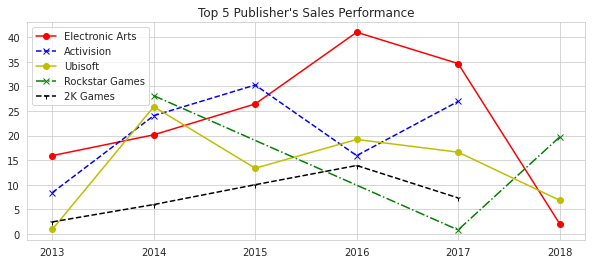

In [123]:
plt.plot(df_final[df_final['Publisher']=='Electronic Arts'][['Year','Total_Sales']].groupby('Year').sum(),'o-r')
plt.plot(df_final[df_final['Publisher']=='Activision'][['Year','Total_Sales']].groupby('Year').sum(), 'x--b')
plt.plot(df_final[df_final['Publisher']=='Ubisoft'][['Year','Total_Sales']].groupby('Year').sum(), 'o-y')
plt.plot(df_final[df_final['Publisher']=='Rockstar Games'][['Year','Total_Sales']].groupby('Year').sum(), 'x-.g')
plt.plot(df_final[df_final['Publisher']=='2K Games'][['Year','Total_Sales']].groupby('Year').sum(), '1--k')
plt.legend(['Electronic Arts', 'Activision','Ubisoft','Rockstar Games','2K Games'])
plt.title("Top 5 Publisher's Sales Performance");

The graph visualizes the performance per year of the the top three publishers. If the graph was linear, we could have inferred that the market is growing and/or the current publisher is improving their games. However, we see that the top publishers are in a stagnant state. We will determine if these publishers' performance are due to the market's performance, resulting to a new hypothesis: <b>(Hypothesis 5) The top publisher's performance is influenced by the market's performance.

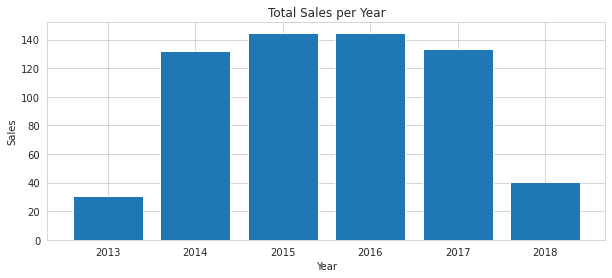

In [124]:
plt.bar(df_final.groupby('Year')['Total_Sales'].sum().index, df_final.groupby('Year')['Total_Sales'].sum())
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales per Year');

Note: The sales in 2013 is low since the PS4 and XBox One was released in the latter part of that year. 

https://en.wikipedia.org/wiki/Xbox

https://en.wikipedia.org/wiki/PlayStation_4

The sales in 2018 may be low since it was last updated in the early part of 2018 (According to Kaggle, the dataset was last updated on May 19, 2019, so I am not entirely sure why the 2018 sales are not filled). 

Seeing that the market is basically stagnant, we should not expect to see tremendous growth from the top publishers. While Activision and Ubisoft may abide by this statement, the contrary can be said about Electronic Arts. Electronic Arts has increased it's yearly sales for every from 2013-2016, peaking in 2016 with a whopping 40 million dollar sale. Their sales went slightly down in 2017, however they are still leading the pack in sales.

<b> Hypothesis 5: True

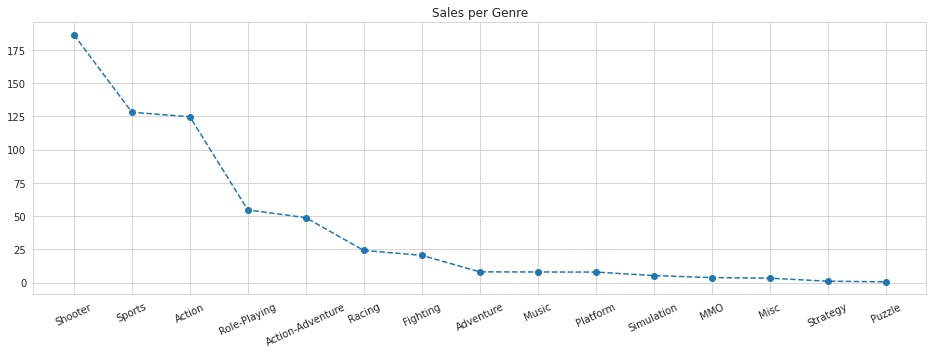

In [125]:
plt.figure(figsize=(16,5))
plt.plot(df_final.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(15), 'o--')
plt.xticks(rotation=25)
plt.title('Sales per Genre');

In [126]:
jovian.commit(project='PS4_and_XBox_Sales_Analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jules-stamaria39/ps4-and-xbox-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis


'https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis'

From this graph, we can create a hypothesis:

<b>Hypothesis 6: A top publisher are creating games according to highest selling genre.

In [127]:
genre_publisher = df_final.copy()
genre_publisher = genre_publisher.to_dict('index')
ea_genre = []
ac_genre = []
ub_genre = []
rg_genre = []
g2k_genre = []
for i in genre_publisher:
    
    if genre_publisher[i]['Publisher'] == 'Activision':
        ac_genre.append(genre_publisher[i]['Genre'])     
    elif genre_publisher[i]['Publisher'] == 'Electronic Arts':
        ea_genre.append(genre_publisher[i]['Genre'])
    elif genre_publisher[i]['Publisher'] == 'Ubisoft':
        ub_genre.append(genre_publisher[i]['Genre'])
    elif genre_publisher[i]['Publisher'] == 'Rockstar Games':
        rg_genre.append(genre_publisher[i]['Genre'])
    elif genre_publisher[i]['Publisher'] == '2K Games':
        g2k_genre.append(genre_publisher[i]['Genre'])
ea_genre = collections.Counter(ea_genre)
ea_genre = pd.DataFrame.from_dict(ea_genre, orient ='index').reset_index()
ea_genre.columns = ['Genre', 'EA Count']
ac_genre = collections.Counter(ac_genre)
ac_genre = pd.DataFrame.from_dict(ac_genre, orient ='index').reset_index()
ac_genre.columns = ['Genre', 'AC Count']
ub_genre = collections.Counter(ub_genre)
ub_genre = pd.DataFrame.from_dict(ub_genre, orient ='index').reset_index()
ub_genre.columns = ['Genre', 'UB Count']
rg_genre = collections.Counter(rg_genre)
rg_genre = pd.DataFrame.from_dict(rg_genre, orient ='index').reset_index()
rg_genre.columns = ['Genre', 'RG Count']
g2k_genre = collections.Counter(g2k_genre)
g2k_genre = pd.DataFrame.from_dict(g2k_genre, orient ='index').reset_index()
g2k_genre.columns = ['Genre', '2KG Count']
list_genres = df_final.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(20).index
list_genres = pd.DataFrame(list_genres)
list_genres.columns=['Genre']
genre_plot = list_genres.merge(ea_genre, on = 'Genre', how = 'left').merge(ac_genre, on='Genre', how = 'left').merge(ub_genre, on='Genre', how = 'left').merge(rg_genre, on='Genre', how = 'left').merge(g2k_genre, on='Genre', how = 'left')
genre_plot = genre_plot.set_index('Genre')
genre_plot = genre_plot.fillna(0)
genre_plot

,EA Count,AC Count,UB Count,RG Count,2KG Count
Genre,,,,,
Shooter,7.0,11.0,4.0,0.0,4.0
Sports,21.0,1.0,1.0,0.0,8.0
Action,1.0,6.0,10.0,1.0,0.0
Role-Playing,2.0,0.0,1.0,0.0,0.0
Action-Adventure,0.0,2.0,3.0,1.0,1.0
Racing,3.0,0.0,4.0,0.0,0.0
Fighting,1.0,0.0,0.0,0.0,0.0
Adventure,0.0,1.0,0.0,1.0,0.0
Music,0.0,1.0,7.0,0.0,0.0


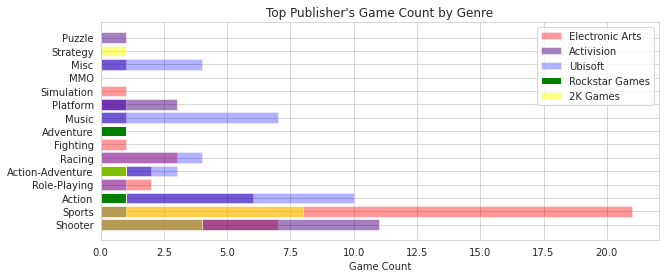

In [128]:
plt.barh(genre_plot.index,genre_plot['EA Count'],  color='red', alpha = 0.4)
plt.barh(genre_plot.index,genre_plot['AC Count'],  color='indigo', alpha = 0.5)
plt.barh(genre_plot.index,genre_plot['UB Count'],  color='blue', alpha = 0.3)
plt.barh(genre_plot.index,genre_plot['RG Count'],  color='green', alpha = 1)
plt.barh(genre_plot.index,genre_plot['2KG Count'],  color='yellow', alpha = 0.5)
plt.title("Top Publisher's Game Count by Genre")
plt.xlabel('Game Count')
plt.legend(['Electronic Arts', 'Activision','Ubisoft','Rockstar Games', '2K Games']);

Despite shooters being the genre with the highest sales, it is evident in this graph that sports leads the category for the top publishers. Notably, Electronic Arts, which is the top publisher in the dataset, leads the sports category with an extremely high sports games count with 20+ total. We may attribute this to the FIFA franchise's success. Another thing to note, this visualization was originally created to prove that the top publishers will be using the leading genres to get more sales. However, the music genre, which is only top 8 in the sales per genre, is actually 4th in quantity in the top publisher's games. The role-playing genre, despite being 4th in sales per genre, is actually one of least quantity in the top publisher's games. 

To a certain degree, we could say that publisher's use leading genres to get the most sales. But we could also argue that dominating in less known genres will also help in generating sales. Concluding, we may need to use statistical methods to fully understand the correlation between the two since we cannot prove if the hypothesis is true or false.

<b> Hypothesis 6: Lack of evidence </b>

In [129]:
jovian.commit(project='PS4_and_XBox_Sales_Analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jules-stamaria39/ps4-and-xbox-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis


'https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis'

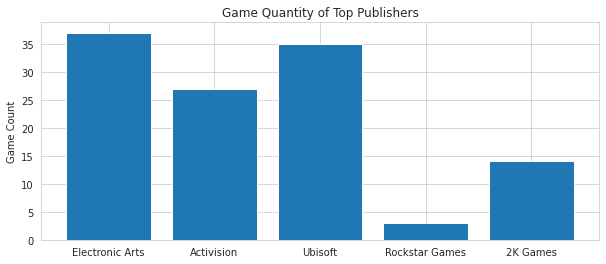

In [130]:
top_pub_game_count = {'Electronic Arts' : genre_plot['EA Count'].sum(), 'Activision':genre_plot['AC Count'].sum(), 'Ubisoft': genre_plot['UB Count'].sum(),'Rockstar Games':genre_plot['RG Count'].sum(), '2K Games': genre_plot['2KG Count'].sum()}
df_top_pub_game_count = pd.DataFrame.from_dict(top_pub_game_count, orient = 'index')
plt.bar(df_top_pub_game_count.index,df_top_pub_game_count[0] )
plt.title('Game Quantity of Top Publishers')
plt.ylabel('Game Count');


Going back to <b>Hypothesis 2</b>, we cannot really say that the hypothesis is true, especially with Rockstar Games being in the top 5 with less than 5 games published. Activision also has less games compared to Ubisoft, but has more sales. Thus, we can conclude that the hypothesis is not true. We can also say the old saying: quality over quantity.

<b> Hypothesis 2: False </b>

In [131]:
PS4_NA_genre_sum = df_final.groupby('Genre')['PS4_NA'].sum()
PS4_EU_genre_sum  = df_final.groupby('Genre')['PS4_EU'].sum()
PS4_JP_genre_sum = df_final.groupby('Genre')['PS4_JP'].sum()
PS4_Rest_of_World_genre_sum = df_final.groupby('Genre')['PS4_Rest_of_World'].sum()
XB1_NA_genre_sum= df_final.groupby('Genre')['XB1_NA'].sum()
XB1_EU_genre_sum=df_final.groupby('Genre')['XB1_EU'].sum()
XB1_JP_genre_sum=df_final.groupby('Genre')['XB1_JP'].sum()
XB1_Rest_of_World_genre_sum=df_final.groupby('Genre')['XB1_Rest_of_World'].sum()

Sales_of_Genre_per_Region = pd.concat([PS4_NA_genre_sum,XB1_NA_genre_sum, PS4_EU_genre_sum, XB1_EU_genre_sum,PS4_JP_genre_sum, XB1_JP_genre_sum,PS4_Rest_of_World_genre_sum,  XB1_Rest_of_World_genre_sum], axis = 1)
Sales_of_Genre_per_Region

,PS4_NA,XB1_NA,PS4_EU,XB1_EU,PS4_JP,XB1_JP,PS4_Rest_of_World,XB1_Rest_of_World
Genre,,,,,,,,
Action,27.85,23.65,38.69,12.17,5.79,0.04,12.88,3.56
Action-Adventure,11.41,8.67,16.56,4.64,0.90,0.00,5.41,1.32
Adventure,2.09,1.83,2.20,0.82,0.10,0.00,0.85,0.27
Fighting,6.56,4.25,4.82,1.20,0.83,0.01,2.30,0.57
MMO,0.85,0.95,1.07,0.42,0.00,0.00,0.37,0.14
Misc,0.71,0.87,0.87,0.45,0.04,0.00,0.31,0.13
Music,2.18,2.73,1.31,0.69,0.00,0.00,0.74,0.37
Platform,1.77,1.40,2.87,0.73,0.08,0.00,0.89,0.23
Puzzle,0.21,0.16,0.12,0.04,0.00,0.00,0.07,0.03


In [132]:
Sales_of_Genre_per_Region['PS4_NA'] = Sales_of_Genre_per_Region['PS4_NA'] / Sales_of_Genre_per_Region['PS4_NA'].sum()
Sales_of_Genre_per_Region['PS4_EU'] = Sales_of_Genre_per_Region['PS4_EU'] / Sales_of_Genre_per_Region['PS4_EU'].sum()
Sales_of_Genre_per_Region['PS4_JP'] = Sales_of_Genre_per_Region['PS4_JP'] / Sales_of_Genre_per_Region['PS4_JP'].sum()
Sales_of_Genre_per_Region['PS4_Rest_of_World'] = Sales_of_Genre_per_Region['PS4_Rest_of_World'] / Sales_of_Genre_per_Region['PS4_Rest_of_World'].sum()
Sales_of_Genre_per_Region['XB1_NA'] = Sales_of_Genre_per_Region['XB1_NA'] / Sales_of_Genre_per_Region['XB1_NA'].sum()
Sales_of_Genre_per_Region['XB1_EU'] = Sales_of_Genre_per_Region['XB1_EU'] / Sales_of_Genre_per_Region['XB1_EU'].sum()
Sales_of_Genre_per_Region['XB1_JP'] = Sales_of_Genre_per_Region['XB1_JP'] / Sales_of_Genre_per_Region['XB1_JP'].sum()
Sales_of_Genre_per_Region['XB1_Rest_of_World'] = Sales_of_Genre_per_Region['XB1_Rest_of_World'] / Sales_of_Genre_per_Region['XB1_Rest_of_World'].sum()
Sales_of_Genre_per_Region = Sales_of_Genre_per_Region*10e1
Sales_of_Genre_per_Region

,PS4_NA,XB1_NA,PS4_EU,XB1_EU,PS4_JP,XB1_JP,PS4_Rest_of_World,XB1_Rest_of_World
Genre,,,,,,,,
Action,18.954604,18.769841,20.270341,20.000000,35.586970,23.529412,19.535871,18.885942
Action-Adventure,7.765603,6.880952,8.676062,7.625308,5.531653,0.000000,8.205673,7.002653
Adventure,1.422446,1.452381,1.152617,1.347576,0.614628,0.000000,1.289246,1.432361
Fighting,4.464711,3.373016,2.525279,1.972062,5.101414,5.882353,3.488548,3.023873
MMO,0.578507,0.753968,0.560591,0.690222,0.000000,0.000000,0.561201,0.742706
Misc,0.483223,0.690476,0.455808,0.739523,0.245851,0.000000,0.470196,0.689655
Music,1.483700,2.166667,0.686331,1.133936,0.000000,0.000000,1.122403,1.962865
Platform,1.204655,1.111111,1.503641,1.199671,0.491703,0.000000,1.349917,1.220159
Puzzle,0.142925,0.126984,0.062870,0.065735,0.000000,0.000000,0.106173,0.159151


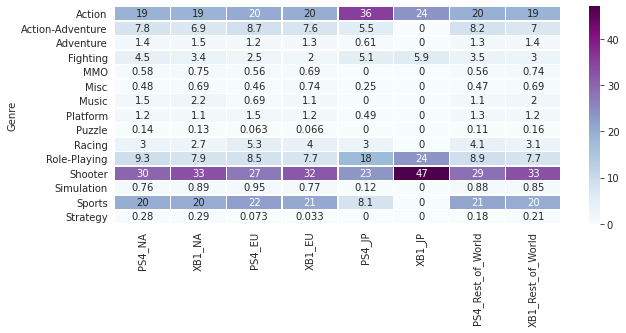

In [133]:
sns.heatmap(Sales_of_Genre_per_Region,
            annot=True, 
            linewidths=.5, 
            cmap='BuPu',);

This graph proves that the trend of genres per region are actually similar with each other except for Japan. Looking at the shooter genre, all regions all hover around 30%. Also, action and sports both hover around 20% in all regions. Thus, we can conclude that the second hypothesis is not true except for Japan. Thus, we can officially debunk the 4th hypothesis. 

<b> Hypothesis 4: False

In [134]:
jovian.commit(project='PS4_and_XBox_Sales_Analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jules-stamaria39/ps4-and-xbox-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis


'https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis'

# Conclusion
1. The publisher of the the top game is also the publisher with the highest sales. <i>FALSE</i>
2. The higher the game count of a publisher, the more sales the publisher has. <i>FALSE</i>
3. The top publisher in the most sold region is also the top publisher in the other regions. <i>TRUE</i>
4. A region's interest in a genre differs from one another due to difference in culture and tradition. <i>FALSE</i> 
5. The top publisher's performance is infulenced by the market's performance. <i>TRUE</i>
6. A top publisher are creating games according to highest selling genre. <i>UNSURE</i>

We learned that the top publisher does not necessarily mean it published the top selling game. Grand Theft Auto V, which is the game with the highest sales, has the publisher on 4th. 

We also learned that the number of games published does not necessarily mean higher sales. This can be seen in Rockstar Games' case, wherein they only published 3 games but managed to get 4th in the top publishers. 

Next, we assumed that the number 1 publisher in the region with the most sales will also be the top in other regions. Despite discovering that Japan has a very different top publisher list, we can confirm the third hypothesis true as this was the case in 3/4 regions. 

We then assumed that the reason to this difference in the publisher list may be due to culture differences, thus we looked at a region's most bought genre. Similar to the third hypothesis, only Japan was found to be different again. Thus, we cannot say that a region's interests in a genre differs because of culture alone. 

For the 5th hypothesis, we discovered that the market is stagnant and we do not expect to see any growth from the top publishers. This statement is true except for Electronic Arts, where it managed to steadily increase its sales through the years. 

Lastly, we cannot conclude that a top publisher is creating games based on the highest selling genre since we see two sides of the arguments in a balanced number.

In [135]:
jovian.commit(project='PS4_and_XBox_Sales_Analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jules-stamaria39/ps4-and-xbox-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis


'https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis'

# Recommendations
1. Get a larger dataset by using a more updated dataset. Additionally, a dataset with more regions involved might help in assessing the 4th hypothesis.
2. Preprocess the data further by grouping a publisher's franchise. For example, grouping FIFA 15, FIFA 16, FIFA 17.. to a single game. This might bring more insight to the top games sold and its implications in the market. 
3. Creating a genre sales per year to learn more from the trend.
4. Preprocess the data further by grouping certain genres together. As seen in the dataset, there are certain genres whose values are so small, it is basically insignificant. Grouping these genres together might help in getting better value for the data.

In [136]:
jovian.commit(project='PS4_and_XBox_Sales_Analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jules-stamaria39/ps4-and-xbox-sales-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis


'https://jovian.ai/jules-stamaria39/ps4-and-xbox-sales-analysis'

# References
Dataset:

https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=XboxOne_GameSales.csv

Code-based Sources:

https://stackoverflow.com/questions/31111032/transform-a-counter-object-into-a-pandas-dataframe
https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-by-zeroes-in-a-column-of-a-pandas-dataframe
https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps
https://www.geeksforgeeks.org/how-to-select-multiple-columns-in-a-pandas-dataframe/
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
https://stackoverflow.com/questions/37039685/hide-axis-values-but-keep-axis-tick-labels-in-matplotlib
https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html
https://datatofish.com/dropna/
https://codereview.stackexchange.com/questions/185389/dropping-rows-from-a-pandas-dataframe-where-some-of-the-columns-have-value-0/185390
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html


In [ ]:
jovian.commit(project='PS4_and_XBox_Sales_Analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
